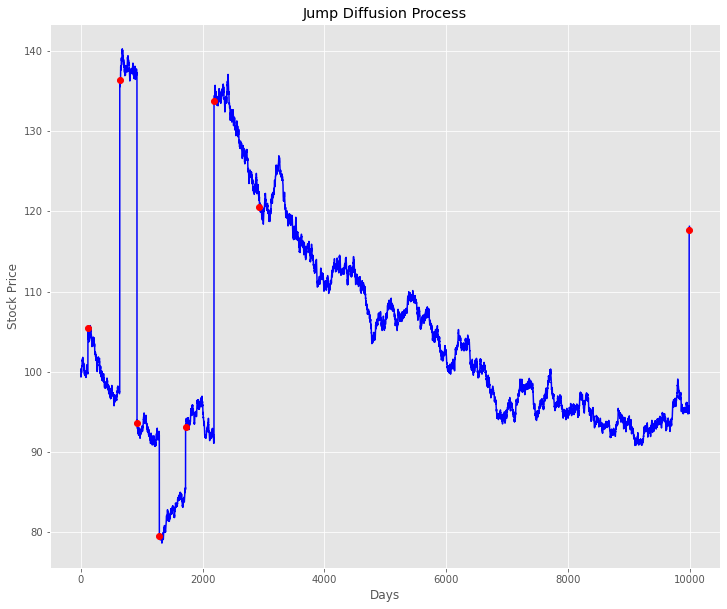

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#plt.style.use('ggplot')


def merton_jump_paths(S, T, r, sigma,  lam, m, v, steps, Npaths):
    size=(steps,Npaths)
    dt = T/steps
    # gibt die poisson- verteilten jumps an
    jumps = np.random.poisson( lam*dt, size=size)

    poi_rv = np.multiply(jumps,
                         np.random.normal(m,v, size=size)).cumsum(axis=0)
    geo = np.cumsum(((r -  sigma**2/2 -lam*(m  + v**2*0.5))*dt +
                     sigma*np.sqrt(dt) *
                     np.random.normal(size=size)), axis=0)

    return np.exp(geo+poi_rv)*S, jumps


S   = 100 # current stock price
T   = 1 # time to maturity
r   = 0.02 # risk free rate
m   = 0 # meean of jump size
v   = 0.3 # standard deviation of jump
lam = 5 # intensity of jump i.e. number of jumps per annum
steps  = 10000 # time steps
Npaths = 1 # number of paths to simulate
sigma  = 0.2 # annaul standard deviation , for weiner process

j, jumps = merton_jump_paths(S, T, r, sigma, lam, m, v, steps, Npaths)

jumps_x = list(np.ndarray.nonzero(jumps))[0]
jumps_y = j[jumps_x]

plt.figure(figsize=(12,10))
plt.plot(j, c= 'blue')
plt.plot(jumps_x,jumps_y,"o",c='red')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Jump Diffusion Process')
plt.show()

In [91]:
j[jumps_list]

array([[36.6429519 ],
       [45.61289802]])

In [92]:
jumps

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [93]:
df = pd.DataFrame(j)

In [94]:
df_csv = pd.read_csv('Jump_Diffusion.csv')

In [95]:
df_csv

,"Time Period t,""Diffusion ε"",""Jump?"",""Jump Value u"",""log(Return)"",""log(Price)"",""Price"",""Jump"","""""
0,"0,"""","""","""","""",""4.61"",""100.00"","""","""""
1,"1,""-0.12%"",""0"",""5.82%"",""-0.02%"",""4.60"",""99.98""..."
2,"2,""-0.58%"",""0"",""1.40%"",""-0.48%"",""4.60"",""99.50""..."
3,"3,""0.21%"",""0"",""-3.70%"",""0.31%"",""4.60"",""99.81"",..."
4,"4,""0.08%"",""0"",""0.11%"",""0.18%"",""4.61"",""100.00"",..."
...,...
530,","""","""","""","""","""","""","""","""""
531,","""","""","""","""","""","""","""","""""
532,","""","""","""","""","""","""","""","""""
533,","""","""","""","""","""","""","""","""""
